In [1]:
import SimpleITK as sitk
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from scipy.ndimage import binary_dilation, center_of_mass
import cv2

In [2]:
scan = sitk.GetArrayFromImage(sitk.ReadImage('/Users/jacob_kitz/Desktop/SeniorDesign/contrast_analysis/data/ct_scans_10-5/6 i-Spiral  3.0  Br38.nii.gz'))
seg_master = sitk.GetArrayFromImage(sitk.ReadImage('/Users/jacob_kitz/Desktop/SeniorDesign/contrast_analysis/data/ct_scans_10-5/Segmentation_1.seg.nrrd'))

In [3]:
def show_image(image, slice = -1):
    if slice == -1:
        plt.imshow(image)
    else:
        plt.imshow(image[slice]) 
    plt.axis('off')

def normalize(scans):
    return (scans - scans.min()) / (scans.max() - scans.min())

In [4]:
scan = normalize(scan)

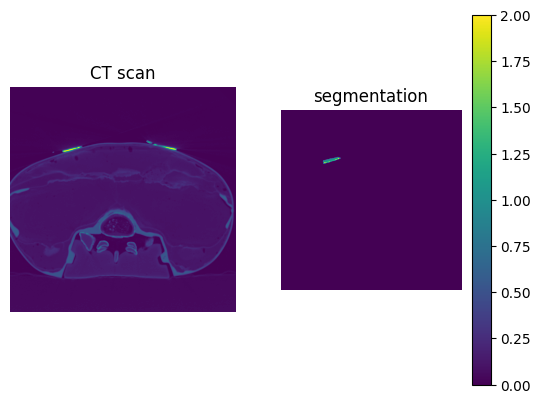

In [5]:
plt.subplot(1,2,1)
show_image(scan, 7)
plt.title('CT scan')
plt.subplot(1,2,2)
show_image(seg_master, 7)
plt.title('segmentation')
plt.colorbar()

[False  True] [False  True]


Text(0.5, 1.0, 'water bg')

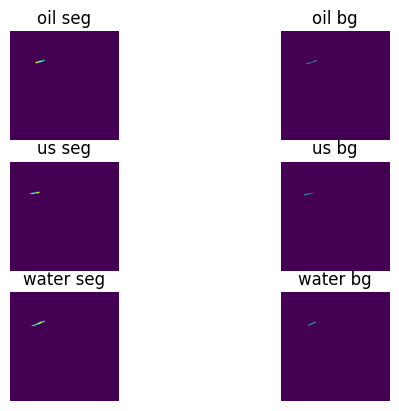

In [8]:
oil_seg = seg_master[7] == 1.
oil_bg = seg_master[7] == 2.
us_seg = seg_master[22] == 3.
us_bg = seg_master[22] == 4.
wat_seg = seg_master[49] == 5.
wat_bg = seg_master[49] == 6.

print(np.unique(wat_seg), np.unique(wat_bg))

plt.subplot(3,2,1)
show_image(oil_seg)
plt.title('oil seg')
plt.subplot(3,2,2)
show_image(oil_bg)
plt.title('oil bg')
plt.subplot(3,2,3)
show_image(us_seg)
plt.title('us seg')
plt.subplot(3,2,4)
show_image(us_bg)
plt.title('us bg')
plt.subplot(3,2,5)
show_image(wat_seg)
plt.title('water seg')
plt.subplot(3,2,6)
show_image(wat_bg)
plt.title('water bg')

In [7]:
# from med physics textbook pg 60
def local_contrast(img, img_bg):
    i1 = np.mean(img)
    i2 = np.mean(img_bg)
    return np.abs((i1 - i2) / i2)

In [8]:
oil_seg_masked = np.multiply(scan[7], oil_seg)
oil_bg_masked = np.multiply(scan[7], oil_bg)
us_seg_masked = np.multiply(scan[22], us_seg)
us_bg_masked = np.multiply(scan[22], us_bg)
wat_seg_masked = np.multiply(scan[49], wat_seg)
wat_bg_masked = np.multiply(scan[49], wat_bg)

In [9]:
c_oil = local_contrast(np.mean(oil_seg_masked[oil_seg_masked != 0.]), np.mean(oil_bg_masked[oil_bg_masked != 0]))
c_us = local_contrast(np.mean(us_seg_masked[us_seg_masked != 0.]), np.mean(us_bg_masked[oil_bg_masked != 0]))
c_wat = local_contrast(np.mean(wat_seg_masked[wat_seg_masked != 0.]), np.mean(wat_bg_masked[wat_bg_masked != 0]))

In [10]:
print(f'Oil local contrast: {c_oil}')
print(f'Ultra sound gel local contrast: {c_us}')
print(f'Water local contrast: {c_wat}')

Oil local contrast: 2.327530524866278
Ultra sound gel local contrast: 7.191961880573056
Water local contrast: 1.2457762163508344
